In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum() #check duplicated row.

0

In [7]:
df.Exited.value_counts() # Alternative way to find df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

#1 hiden layer
# model.add(Dense(3,activation='sigmoid',input_dim = 11))
# model.add(Dense(1,activation='sigmoid'))
#2 hiden layer
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) #model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(x_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.6321 - accuracy: 0.6538 - val_loss: 0.4823 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.7955 - val_loss: 0.4526 - val_accuracy: 0.7962
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7961 - val_loss: 0.4393 - val_accuracy: 0.8006
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8073 - val_loss: 0.4318 - val_accuracy: 0.8150
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8138 - val_loss: 0.4270 - val_accuracy: 0.8175
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8169 - val_loss: 0.4208 - val_accuracy: 0.8231
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8239 - val_loss: 0.4140 - val_accuracy: 0.8263

Epoch 58/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8653 - val_loss: 0.3447 - val_accuracy: 0.8569
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8659 - val_loss: 0.3450 - val_accuracy: 0.8594
Epoch 60/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8687 - val_loss: 0.3432 - val_accuracy: 0.8600
Epoch 61/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8662 - val_loss: 0.3447 - val_accuracy: 0.8562
Epoch 62/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8659 - val_loss: 0.3431 - val_accuracy: 0.8606
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8681 - val_loss: 0.3435 - val_accuracy: 0.8575
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8653 - val_loss: 0.3436 - val_accuracy:

In [24]:
model.layers[0].get_weights()

[array([[ 7.39296898e-02, -3.02216299e-02, -1.65930837e-02,
         -3.88195850e-02,  1.11208037e-01,  4.99026254e-02,
          1.40084490e-01, -6.69748113e-02,  3.88747677e-02,
          1.82518065e-01, -3.30907516e-02],
        [-9.49357271e-01,  1.53608872e-02, -1.27526596e-01,
         -4.19026345e-01, -7.18018472e-01,  6.58981562e-01,
         -9.67737615e-01,  2.83916831e-01,  6.49188280e-01,
          5.59440672e-01, -1.38061479e-01],
        [-1.01613568e-03, -5.32503910e-02, -1.41585648e-01,
         -4.73673828e-02,  8.85952488e-02,  3.22407395e-01,
          3.02867055e-01,  1.93222776e-01, -9.08084810e-02,
          9.65512171e-02, -2.06516355e-01],
        [ 1.76402733e-01, -6.64838031e-02, -2.44624764e-01,
         -1.27311814e+00, -3.57107520e-01, -9.12630439e-01,
         -3.98735344e-01, -3.57411772e-01, -2.18397260e-01,
          4.29965258e-01, -6.39228046e-01],
        [-1.27564603e-02,  1.40473294e+00, -9.05127466e-01,
         -8.85023952e-01,  2.34159991e-01, -

In [25]:
model.layers[1].get_weights()

[array([[-7.16970041e-02,  3.30967128e-01,  5.93539476e-01,
          2.48667657e-01, -2.46150896e-01, -6.82697743e-02,
          8.90693486e-01, -3.29778135e-01,  6.34014845e-01,
         -9.63744998e-01, -4.57707524e-01],
        [ 4.88184541e-01, -2.43483767e-01, -8.60221013e-02,
         -1.18558049e+00,  8.86337340e-01, -2.05856696e-01,
         -2.03697950e-01, -1.89747047e+00,  8.51147473e-02,
          7.81088710e-01,  5.65804899e-01],
        [ 5.31776428e-01, -1.64687216e-01, -1.32045403e-01,
          5.76050997e-01, -3.64304125e-01,  4.88861129e-02,
         -1.41760617e-01, -3.01909372e-02,  3.59844029e-01,
          5.75916171e-01,  1.02271862e-01],
        [-6.63942993e-01,  5.20019889e-01,  1.32990971e-01,
          3.18603665e-01,  5.75446263e-02, -5.57361059e-02,
          7.00501978e-01,  8.28210890e-01,  1.32725458e-03,
          1.71343088e-01, -4.28260304e-02],
        [-1.92728192e-01,  2.67495625e-02, -2.30989292e-01,
          3.97610962e-01,  4.07726198e-01,  

In [26]:
model.layers[2].get_weights()

[array([[ 0.58239055],
        [-0.6187861 ],
        [-0.4094192 ],
        [ 0.5090009 ],
        [ 1.1852164 ],
        [-1.0963454 ],
        [-0.46284178],
        [ 1.0025849 ],
        [-0.16336928],
        [ 1.3006593 ],
        [ 1.1000861 ]], dtype=float32),
 array([-0.03092771], dtype=float32)]

In [27]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [28]:
y_pred = np.where(y_log>0.5,1,0)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.859

In [31]:
import matplotlib.pyplot as plt

In [32]:
history.history

{'loss': [0.6321206092834473,
  0.46406227350234985,
  0.44314244389533997,
  0.43227261304855347,
  0.42512381076812744,
  0.41894325613975525,
  0.4116104245185852,
  0.4020041525363922,
  0.39048659801483154,
  0.3784729838371277,
  0.3674570322036743,
  0.35862109065055847,
  0.3531739115715027,
  0.34883010387420654,
  0.34613236784935,
  0.34369605779647827,
  0.3422309458255768,
  0.3407195210456848,
  0.3396300971508026,
  0.33892878890037537,
  0.3374330997467041,
  0.3371094763278961,
  0.33655697107315063,
  0.3354588747024536,
  0.3348345458507538,
  0.33460715413093567,
  0.333469957113266,
  0.3334839642047882,
  0.3332679867744446,
  0.3329787850379944,
  0.3320719599723816,
  0.33145222067832947,
  0.33106744289398193,
  0.3310934007167816,
  0.33071067929267883,
  0.3297514319419861,
  0.3301314115524292,
  0.32995784282684326,
  0.329121470451355,
  0.32862046360969543,
  0.3288267254829407,
  0.3282283842563629,
  0.3281397223472595,
  0.32788658142089844,
  0.328064

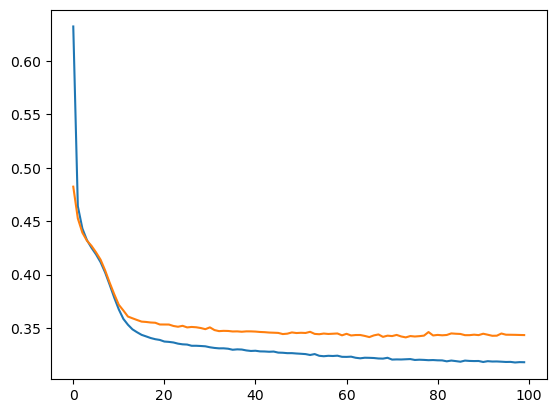

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

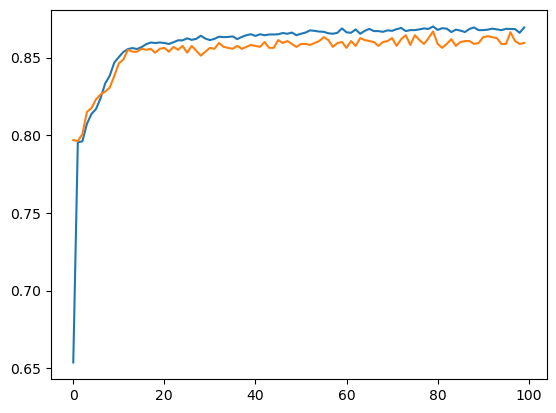

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [35]:
#A link
#https://www.kaggle.com/code/campusx/notebook8ad570467f/notebook